In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from tqdm import tqdm

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(url, header =0)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [6]:


#    TASK 1: USING CROSS VALIDATION TO IMPROVE THE MODEL



In [7]:
# Divide the dataset into x_data and y_data parameters.

y_data = df['Price']
x_data = df._get_numeric_data().drop('Price', axis = 1)


In [8]:
# Split the data set into training and testing subsets such that you reserve 10% of the data set for testing purposes:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 1)


In [9]:
# Create a single variable linear regression model using "CPU_frequency" parameter.
# Print the R^2 value of this model for the training and testing subsets.

lr = LinearRegression()
lr.fit(x_train[['CPU_frequency']], y_train)

x_train_score = lr.score(x_train[['CPU_frequency']], y_train)
x_test_score = lr.score(x_test[['CPU_frequency']], y_test)

print(x_train_score)
print(x_test_score)

0.14829792099817973
-0.06599437350393766


In [10]:

# Run a 4-fold cross validaton on the model and print the mean value of R^2 score alon with its standard deviation

cross = cross_val_score(lr, x_data[['CPU_frequency']], y_data, cv =4)

print("The mean value of R^2 score is: ", cross.mean(), "and the standard deviation is: ", cross.std())


The mean value of R^2 score is:  -0.16109232388595118 and the standard deviation is:  0.3849579786664711


In [11]:


#                  TASK 2: OVERFITTING



In [12]:

# Split the data set into training and testing components again, this time reserving 50% of the data set for testing:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.5, random_state = 0)


In [13]:
# To identity the point of overfitting the model on the parameter "CPU_frequency",
# you'll need to create polynomial features using the single attribute. You need to
# evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5.
# Save this set of values of R^2 score as a list.

lr = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

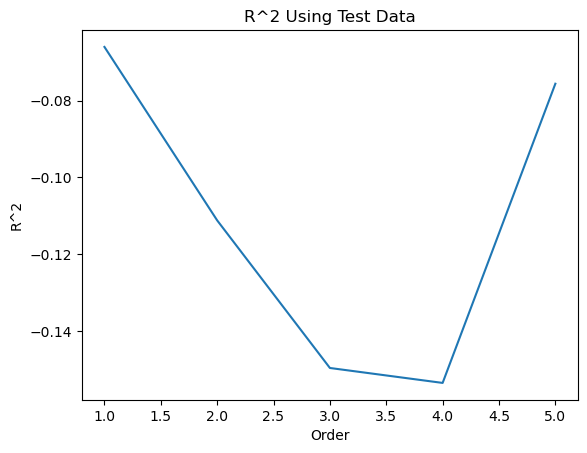

In [14]:
plt.plot(order, Rsqu_test)
plt.xlabel("Order")
plt.ylabel("R^2")
plt.title("R^2 Using Test Data")

In [15]:


#                TASK 3: RIDGE REGRESSION



In [16]:
# Considering having multiple features, create a polynomial feature model that uses all these parameters with degree = 2.
# Also create the training and testing attribute sets.

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])


In [17]:
# Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
# Create a list of all Ridge Regression R^2 scores for training and testing data:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:06<00:00, 150.21it/s, Test Score=0.371, Train Score=0.634]


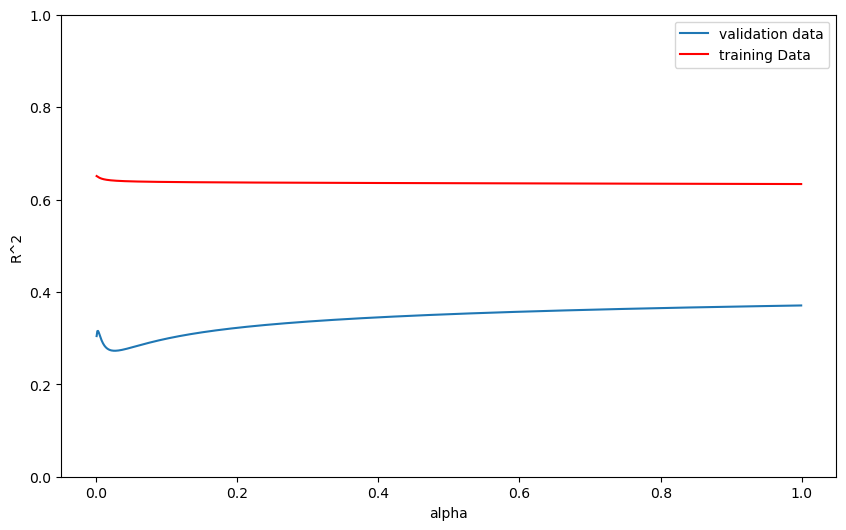

In [18]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [19]:


#                 TASK 4: GRID SEARCH



In [21]:
# Using the raw data and the same set of features as used above, use 
# GridSearchCV to identify the value of alpha for which the model performs best.

parameters1 = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]


In [22]:
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv =4)

In [23]:

Grid1.fit(x_data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [24]:
BestRR = Grid1.best_estimator_

print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.30356420547270113
